In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats



In [12]:


file_path = 'StressLevelDataset.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()

# Display the first few rows of the dataset
data_head = data.head(5)

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

(None,
    anxiety_level  self_esteem  mental_health_history  depression  headache  \
 0             14           20                      0          11         2   
 1             15            8                      1          15         5   
 2             12           18                      1          14         2   
 3             16           12                      1          15         4   
 4             16           28                      0           7         2   
 
    blood_pressure  sleep_quality  breathing_problem  noise_level  \
 0               1              2                  4            2   
 1               3              1                  4            3   
 2               1              2                  2            2   
 3               3              1                  3            4   
 4               3              5                  1            3   
 
    living_conditions  ...  basic_needs  academic_performance  study_load  \
 0                  3  .

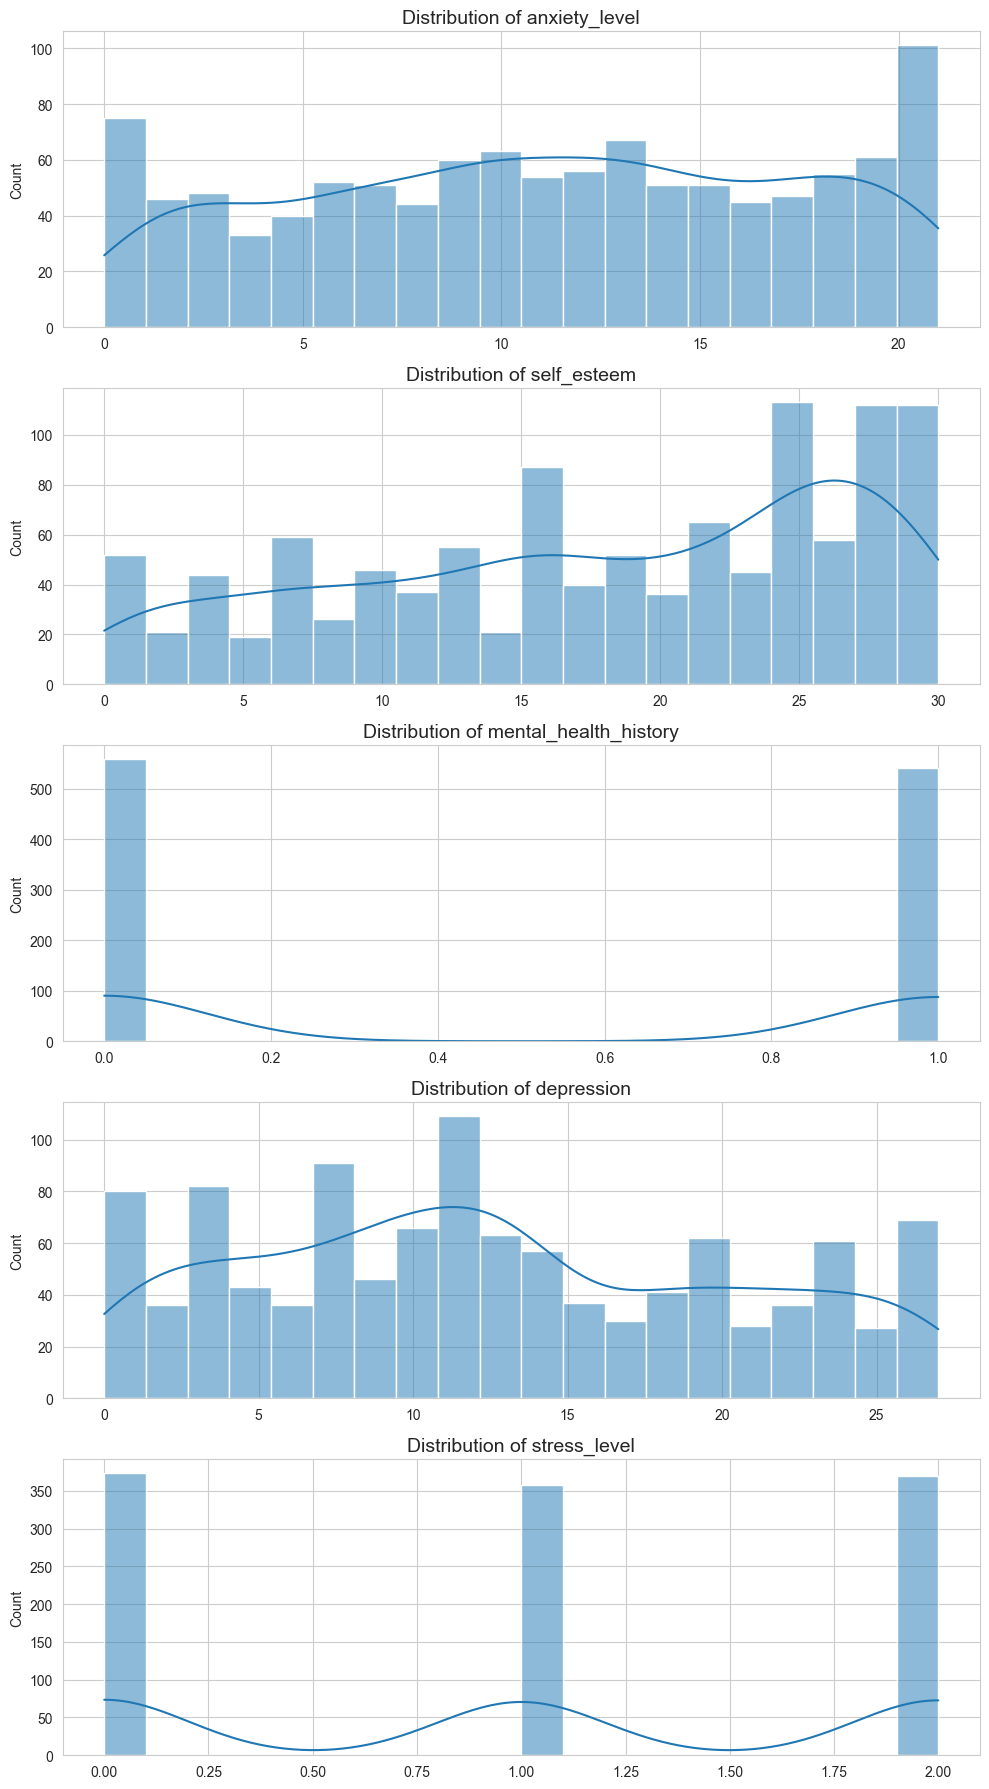

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

# List of some columns to visualize
columns_to_visualize = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'stress_level']


fig, axes = plt.subplots(nrows=len(columns_to_visualize), ncols=1, figsize=(10, 18))

# Plotting the distribution of selected columns
for i, col in enumerate(columns_to_visualize):
    sns.histplot(data[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


The dataset contains 1100 entries and 21 columns, with no missing values. Here are some key points from the statistical summary:

Variables like anxiety_level, self_esteem, depression, headache, and several others, are numerical and seem to be rated on different scales.
The stress_level variable, which may be our primary variable of interest, is also numerical and ranges from 0 to 2.

In [14]:

statistics_df = pd.DataFrame(index=['mean', 'median', 'mode', 'variance', 'std_dev', 'skewness', 'kurtosis'])


for col in columns_to_visualize:
    statistics_df[col] = [
        data[col].mean(),
        data[col].median(),
        data[col].mode()[0], 
        data[col].var(),
        data[col].std(),
        data[col].skew(),
        data[col].kurt()
    ]

statistics_df


,anxiety_level,self_esteem,mental_health_history,depression,stress_level
mean,11.063636,17.777273,0.492727,12.555455,0.996364
median,11.000000,19.000000,0.000000,12.000000,1.000000
mode,13.000000,25.000000,0.000000,10.000000,0.000000
variance,37.424518,80.005852,0.250175,59.706658,0.675146
std_dev,6.117558,8.944599,0.500175,7.727008,0.821673
skewness,-0.082612,-0.396539,0.029134,0.216638,0.006728
kurtosis,-1.094132,-1.061830,-2.002796,-0.988845,-1.518906


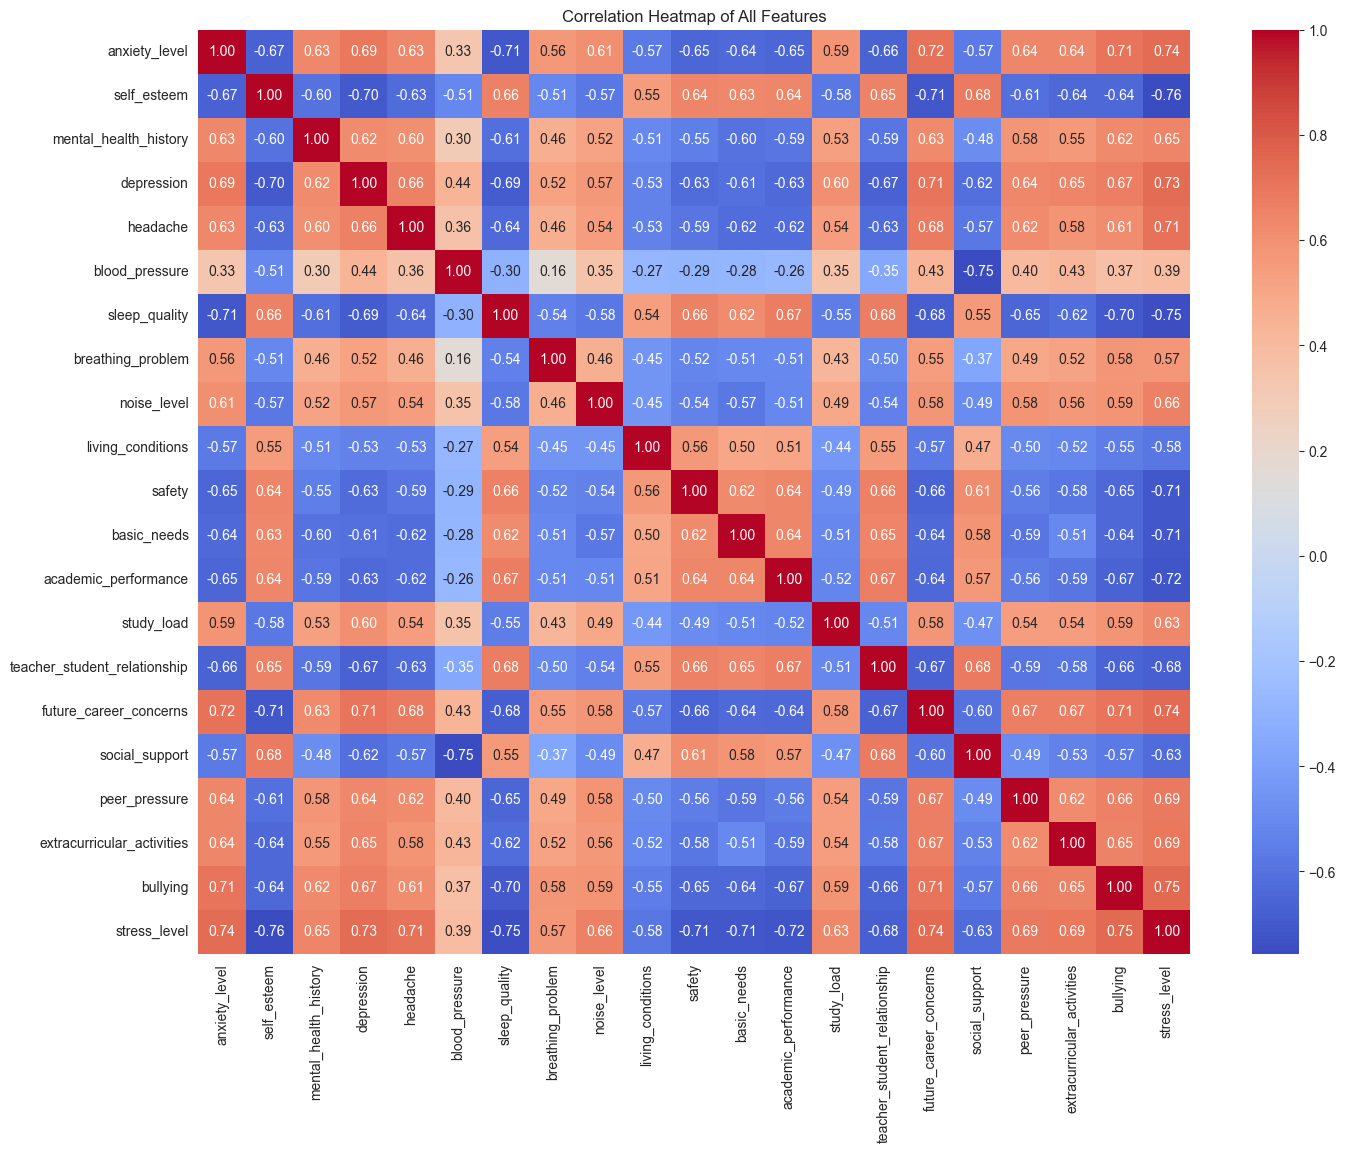

In [16]:

correlation_matrix = data.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of All Features')
plt.show()


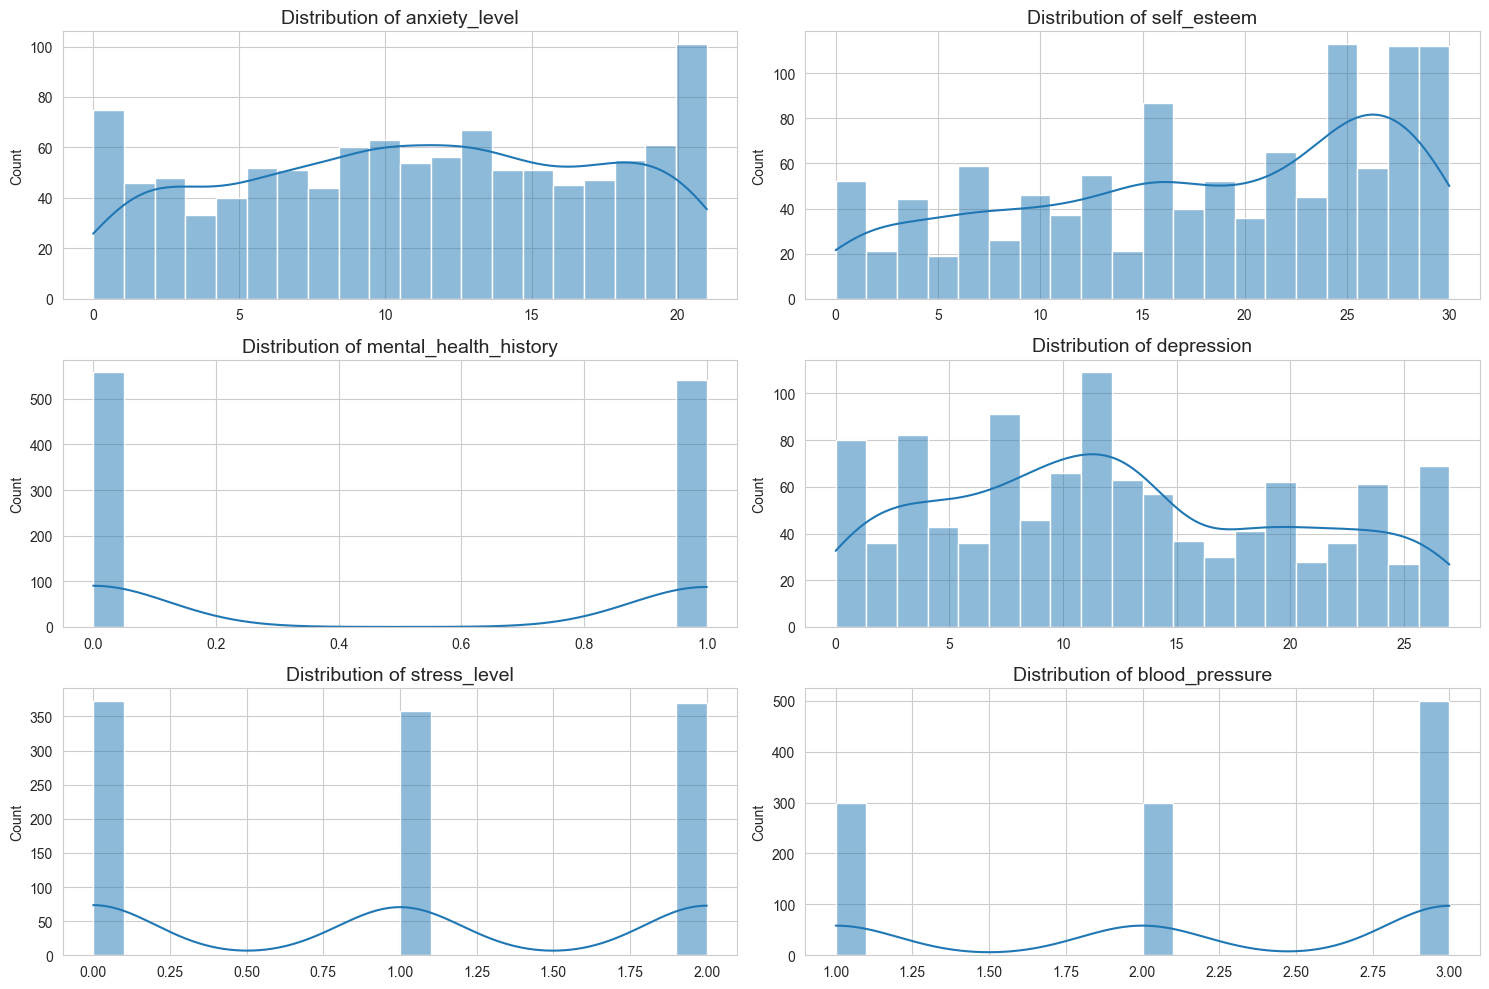

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


sns.set_style("whitegrid")



# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))  # Adjusting the layout to 3x2

# Flatten the axes array for easy iteration
flat_axes = axes.flatten()

# Plotting the distribution of selected columns
for i, col in enumerate(columns_to_visualize):
    sns.histplot(data[col], bins=20, kde=True, ax=flat_axes[i])
    flat_axes[i].set_title(f'Distribution of {col}', fontsize=14)
    flat_axes[i].set_xlabel('')
    flat_axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


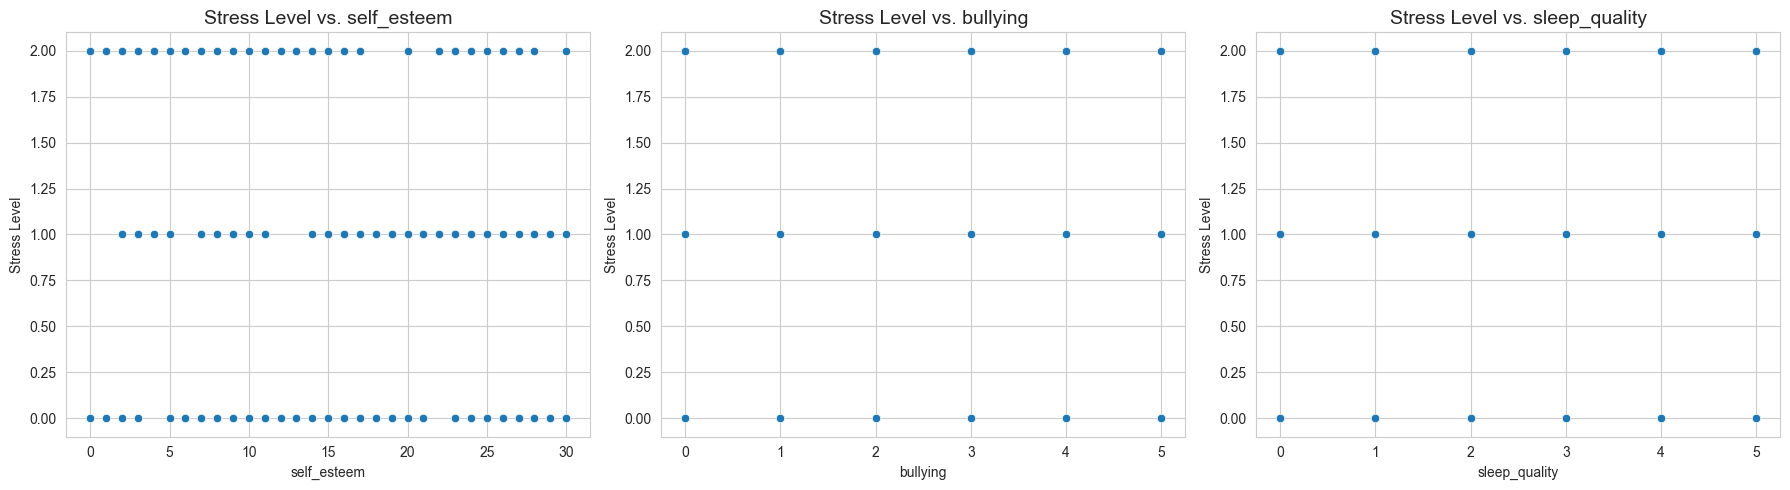

In [33]:

correlation_with_stress = correlation_matrix['stress_level'].drop('stress_level')  
top_correlated_features = correlation_with_stress.abs().sort_values(ascending=False).head(3).index.tolist()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, feature in enumerate(top_correlated_features):
    sns.scatterplot(x=data[feature], y=data['stress_level'], ax=axes[i])
    axes[i].set_title(f'Stress Level vs. {feature}', fontsize=14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Stress Level')

plt.tight_layout()
plt.show()


In [11]:

central_tendency = df[hist_vars].agg(['mean', 'median'])
mode_values = df[hist_vars].mode().iloc[0]
variability = df[hist_vars].agg(['min', 'max', 'var', 'std'])
shape = df[hist_vars].agg(['skew', 'kurt'])
descriptive_stats = pd.concat([central_tendency, variability, shape])
descriptive_stats.loc['mode'] = mode_values 
descriptive_stats


,anxiety_level,self_esteem,depression,stress_level
mean,11.063636,17.777273,12.555455,0.996364
median,11.000000,19.000000,12.000000,1.000000
min,0.000000,0.000000,0.000000,0.000000
max,21.000000,30.000000,27.000000,2.000000
var,37.424518,80.005852,59.706658,0.675146
std,6.117558,8.944599,7.727008,0.821673
skew,-0.082612,-0.396539,0.216638,0.006728
kurt,-1.094132,-1.061830,-0.988845,-1.518906
mode,13.000000,25.000000,10.000000,0.000000


In [32]:
from scipy import stats
import numpy as np

# Randomly shuffle the dataset and split into two groups
shuffled_data = data.sample(frac=1, random_state=1).reset_index(drop=True)
group_1 = shuffled_data.iloc[:550, :]  # Regular period
group_2 = shuffled_data.iloc[550:, :]  # Exam period

# For the sake of the scenario, we will compare the 'stress_level' between the two groups
# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(group_1['stress_level'], group_2['stress_level'])

t_stat, p_value


(-0.07335643066073064, 0.9415358481143766)